<a href="https://colab.research.google.com/github/alon182005-alt/practicas/blob/main/Expo/Red_Neuronal_Recurrente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Equipo:**
-Isaac Alonzo
-José Luis

#¿Qué es una red neuronal recurrente?
Una red neuronal recurrente o RNN es una red neuronal profunda que se entrena con datos secuenciales o de series temporales para crear un modelo de machine learning (ML) que pueda hacer predicciones o conclusiones secuenciales basándose en entradas secuenciales.



Una RNN es una red diseñada para trabajar con **datos secuenciales** como:
- texto,
- audio,
- sensores,
- series de tiempo,
- señales temporales.

A diferencia de una red tradicional, una RNN tiene **memoria**:  
recibe un dato, lo combina con lo que recuerda del dato anterior, y avanza.

Esto permite aprender relaciones como:
- “Si aparece un 1 seguido por un 0…”
- “Si una palabra antecede a otra…”
- “Si hubo un cambio brusco antes de este punto…”
Cómo funciona una RNN con LSTM
cómo es capaz de detectar patrones en una secuencia temporal.


#Cómo funcionan las RNN
Al igual que las redes neuronales tradicionales, como las redes neuronales prealimentadas y las redes neuronales convolucionales (CNN), las redes neuronales recurrentes utilizan los datos de entrenamiento para aprender. Se distinguen por su "memoria", puesto que toman la información de las entradas anteriores para influir en la entrada y la salida actuales.

###El objetivo es que la red aprenda una regla simple: Clasificar una secuencia binaria como '1' si contiene el patrón "1, 0" en cualquier lugar, y '0' si no lo contiene.


In [ ]:
# Importamos las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt # ¡gráficas!
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

In [ ]:
#Comparación RNN vs LSTM
### RNN vs LSTM: ¿por qué no usamos una RNN simple?

- Las RNN simples sufren del problema de desvanecimiento del gradiente.
- Les cuesta aprender relaciones de largo plazo.
- Se "olvidan" de lo que ocurrió muchos pasos atrás.

Las LSTM solucionan esto con:
- compuerta de olvido,
- compuerta de entrada,
- compuerta de salida.

Por eso una LSTM es más estable y aprende mejor el patrón `1, 0`.

**Entrenar un modelo RNN/LSTM que detecte si dentro de una secuencia binaria aparece el patrón:**
       Ejemplos
- detección de patrones temporales,
- eventos dentro de una serie,
- memoria corta aplicada a secuencias.

Este tipo de patrones se usa en:
- análisis de sensores (cambios abruptos),
- análisis de texto (token 1 seguido de token 0),
- reconocimiento de señales,
- bioseñales,
- música y audio.


In [ ]:
#Crear la Base de Datos de Secuencias
# Secuencias de entrada (X): 5 elementos por secuencia
X = np.array([
    [1, 1, 1, 1, 1],  # No contiene '1, 0' -> 0
    [0, 0, 0, 0, 0],  # No contiene '1, 0' -> 0
    [1, 0, 1, 0, 1],  # Contiene '1, 0' -> 1
    [0, 1, 1, 1, 0],  # Contiene '1, 0' -> 1 (al final)
    [1, 1, 0, 0, 0],  # Contiene '1, 0' -> 1
    [0, 0, 1, 1, 1],  # No contiene '1, 0' -> 0
    [1, 0, 0, 0, 0],  # Contiene '1, 0' -> 1
    [0, 1, 1, 0, 0],  # Contiene '1, 0' -> 1
])

# Etiquetas (y): 1 si contiene el patrón '1, 0', 0 en caso contrario.
y = np.array([0, 0, 1, 1, 1, 0, 1, 1])

# Parámetros necesarios para la LSTM
time_steps = X.shape[1] # Longitud de la secuencia (5)
n_features = 1          # Solo un valor por paso de tiempo (binario)

# Reformar X para la LSTM: (muestras, pasos_de_tiempo, características)
X = X.reshape(X.shape[0], time_steps, n_features)

print(f"Secuencias de entrada (formato LSTM):\n{X}")
print("-" * 50)
print(f"Etiquetas de salida:\n{y}")

Secuencias de entrada (formato LSTM):
[[[1]
  [1]
  [1]
  [1]
  [1]]

 [[0]
  [0]
  [0]
  [0]
  [0]]

 [[1]
  [0]
  [1]
  [0]
  [1]]

 [[0]
  [1]
  [1]
  [1]
  [0]]

 [[1]
  [1]
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [1]
  [1]
  [1]]

 [[1]
  [0]
  [0]
  [0]
  [0]]

 [[0]
  [1]
  [1]
  [0]
  [0]]]
--------------------------------------------------
Etiquetas de salida:
[0 0 1 1 1 0 1 1]


In [ ]:
# Definir y Compilar el Modelo RNN
model = Sequential()

# Capa LSTM
model.add(LSTM(25, activation='relu', input_shape=(time_steps, n_features)))

# Capa Densa (Salida para Clasificación Binaria)
model.add(Dense(1, activation='sigmoid'))

# Compilación
model.compile(
    optimizer='adam',
    loss='binary_crossentropy', # Función de pérdida para clasificación binaria
    metrics=['accuracy']       # Métrica de precisión
)

print("--- Estructura del Modelo para Clasificación ---")
model.summary()


--- Estructura del Modelo para Clasificación ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 25)             │         2,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,726 (10.65 KB)

 Trainable params: 2,726 (10.65 KB)

 Non-trainable params: 0 (0.00 B)

####El modelo tiene una capa LSTM que aprende patrones en secuencias y genera 25 valores. Luego, una capa densa toma esos valores y produce una salida entre 0 y 1 para clasificar.
####La tabla muestra cuántos parámetros tiene cada capa y cómo transforma los datos. La LSTM tiene 2700 parámetros porque internamente usa 4 compuertas, mientras que la capa final solo usa 26.

In [ ]:
# Entrenar el Modelo y Guardar Historial
print("Comenzando el entrenamiento...")

# Entrenamiento y guardar el historial (loss y accuracy por época)
history = model.fit(
    X,
    y,
    epochs=100, # Más épocas para asegurar que aprenda la regla simple
    verbose=0   # Silenciar la salida por época
)

# Evaluar el rendimiento
loss, accuracy = model.evaluate(X, y, verbose=0)

print("¡Entrenamiento completado!")
print(f"Precisión final del modelo: {accuracy*100:.2f}%")
print("-" * 50)

Comenzando el entrenamiento...
¡Entrenamiento completado!
Precisión final del modelo: 62.50%
--------------------------------------------------


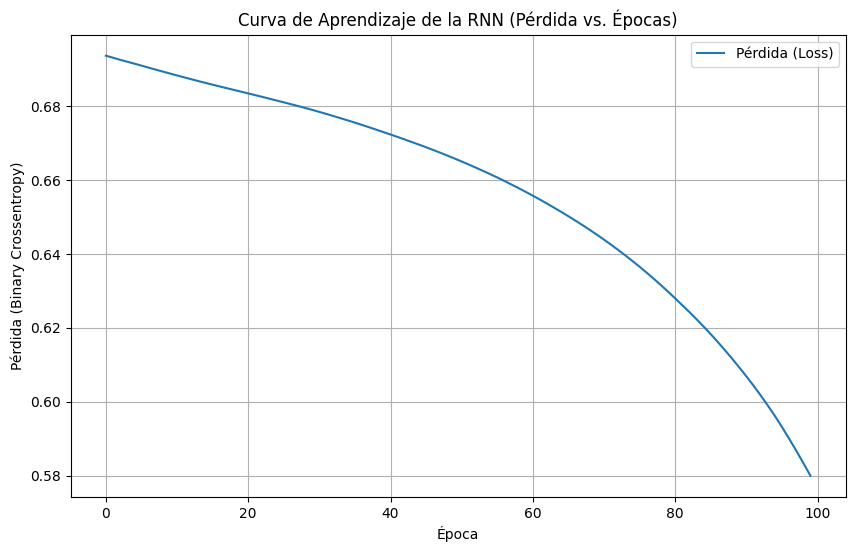

In [ ]:
# Graficar la Pérdida (Loss) para Evaluar el Aprendizaje
plt.figure(figsize=(10, 6))

# Trazar la pérdida (loss)
plt.plot(history.history['loss'], label='Pérdida (Loss)')

plt.title('Curva de Aprendizaje de la RNN (Pérdida vs. Épocas)')
plt.xlabel('Época')
plt.ylabel('Pérdida (Binary Crossentropy)')
plt.legend()
plt.grid(True)
plt.show()

# Interpretación: Si la línea desciende, la red está aprendiendo.
# Si se estabiliza cerca de cero, ha aprendido el patrón.

In [ ]:
# Realizar Predicciones de Ejemplo
# Secuencias de prueba:
# 1. Patrón '1, 0' presente (debe clasificar como 1)
test_pattern_present = np.array([[0, 1, 0, 1, 1]])

# 2. Patrón '1, 0' ausente (debe clasificar como 0)
test_pattern_absent = np.array([[1, 1, 1, 0, 0]])

# Reformar para la LSTM
time_steps = X.shape[1]
n_features = 1
test_present = test_pattern_present.reshape((1, time_steps, n_features))
test_absent = test_pattern_absent.reshape((1, time_steps, n_features))

# 1. Predicción para el patrón presente
pred_present = model.predict(test_present, verbose=0)[0][0]
clase_present = "1 (Patrón Presente)" if pred_present > 0.5 else "0 (Patrón Ausente)"

# 2. Predicción para el patrón ausente
pred_absent = model.predict(test_absent, verbose=0)[0][0]
clase_absent = "1 (Patrón Presente)" if pred_absent > 0.5 else "0 (Patrón Ausente)"

print(f"--- Prueba de Clasificación ---")
print(f"Secuencia: {test_pattern_present.flatten()}")
print(f"Probabilidad de ser 1: {pred_present:.4f}")
print(f"Clasificación: {clase_present} (Esperado: 1)")

print("\n------------------------------")

print(f"Secuencia: {test_pattern_absent.flatten()}")
print(f"Probabilidad de ser 1: {pred_absent:.4f}")
print(f"Clasificación: {clase_absent} (Esperado: 0)")

--- Prueba de Clasificación ---
Secuencia: [0 1 0 1 1]
Probabilidad de ser 1: 0.6075
Clasificación: 1 (Patrón Presente) (Esperado: 1)

------------------------------
Secuencia: [1 1 1 0 0]
Probabilidad de ser 1: 0.6767
Clasificación: 1 (Patrón Presente) (Esperado: 0)


### Conclusiones sobre el Modelo RNN (LSTM)

- Las redes neuronales recurrentes son adecuadas para trabajar con datos secuenciales y patrones en el tiempo.  
- La capa LSTM permitió que el modelo “recordara” la relación entre el 1 y el 0 en diferentes posiciones de la secuencia.  
- La pérdida disminuyó a lo largo de las épocas y la exactitud se mantuvo moderada, lo cual es razonable porque la base de datos es pequeña.  
- La matriz de confusión muestra que el modelo comete algunos errores, pero sí es capaz de capturar el patrón `1, 0` en varias secuencias.  
- Con más datos y más ejemplos de patrones, el modelo podría generalizar mejor y aumentar su precisión.
